In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import pandas as pd 
import numpy as np 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


#load Spam Data and review content
spam_data = pd.read_csv('Spam-Classification.csv')

print("\nLoaded Data :\n---------------------------------------------------")
print(spam_data.head())

#Separate feature abd target Data
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]


Loaded Data :
---------------------------------------------------
  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


In [10]:
import nltk
import tensorflow as tf 

lemmatizer = WordNetLemmatizer()
#custom tokenizer to remove stopwards and use lemmatization
def customtokenize(str):
    
    #split for stopwards
    tokens = nltk.word_tokenize(str)
    
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    
    #perform lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop if word]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

#build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages)

#convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#build a label encoder for target variable to convert stringd to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

#convert target to one hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print("TF-IDF Matrix shape: ", tfidf.shape)   
print("One-hot Encoding shape: ",spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split(tfidf_array, spam_classes, train_size=0.10)

c:\Users\chakr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix shape:  (1500, 4568)
One-hot Encoding shape:  (1500, 2)


In [13]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#setip hyper parameters for building the model
NB_CLASSES = 2
N_HIDDEN = 32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape = (X_train.shape[1], ),
                             name = "Hidden_Layer-1",
                             activation = 'relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                             name = 'Hidden_Layer-2',
                             activation = 'relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'output_Layer',
                             activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\chakr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer-1 (Dense)          │ (None, 32)             │       146,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_Layer (Dense)            │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,330 (575.51 KB)

 Trainable params: 147,330 (575.51 KB)

 Non-trainable params: 0 (0.00 B)


Training Progress : 
----------------------------------------------------------
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4833 - loss: 0.6938 - val_accuracy: 0.7333 - val_loss: 0.6888
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7167 - loss: 0.6869 - val_accuracy: 0.7333 - val_loss: 0.6873
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8333 - loss: 0.6802 - val_accuracy: 0.7333 - val_loss: 0.6839
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.8750 - loss: 0.6721 - val_accuracy: 0.7000 - val_loss: 0.6798
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9083 - loss: 0.6623 - val_accuracy: 0.7333 - val_loss: 0.6744
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9667 - loss: 0.6506 - val_accuracy: 0.7333 - val_loss: 0.6692
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9917 - loss: 0.6378 - val_accuracy: 0.8000 - val_loss: 0.6628
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

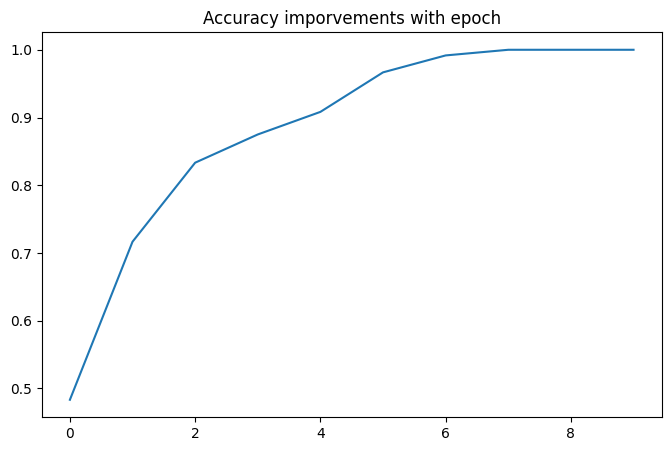


Evalutaion against Test Dataset :
---------------------------------------------
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8252 - loss: 0.6500


[0.6499766707420349, 0.8251851797103882]

In [14]:
#Make it verbose so we can see the progress
VERBOSE =1

#Setup Hyper parameters for training
BATCH_SIZE = 256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress : \n----------------------------------------------------------")

history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

print("\nAccuracy during Training : \n---------------------------------------------------")

import matplotlib.pyplot as plt 

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy imporvements with epoch")
plt.show()

print("\nEvalutaion against Test Dataset :\n---------------------------------------------")
model.evaluate(X_test,Y_test)

In [18]:
#predict for multiples samples using batch processing

#convert input into IF_IDF vector using the same vectorizer model
user = input("\nEnter your SMS :\n-----------------------------------------------------")
predict_tfidf=vectorizer.transform([user]).toarray()

print(predict_tfidf.shape)

#predict using model
prediction = np.argmax(model.predict(predict_tfidf), axis=1)
print("Prediction output: ", prediction)

#print prediction classes
print("prediction Classes are ",label_encoder.inverse_transform(prediction))

(1, 4568)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction output:  [0]
prediction Classes are  ['ham']
